In [1]:
import pandas as pd
df = pd.read_csv("cleaned_sales_data_v5.csv")

In [2]:
df = df.drop(['region', 'state','lat','long','cluster','posting_date'], axis=1)
df = df[df['price'] != 0]

In [3]:
print(df['price'].describe())

count    3.193730e+05
mean     4.267321e+04
std      9.362165e+06
min      1.000000e+00
25%      6.990000e+03
50%      1.399500e+04
75%      2.541400e+04
max      3.736929e+09
Name: price, dtype: float64


In [4]:
#IQR Method
# กำหนดค่า Q1 และ Q3
Q1 = 6990
Q3 = 25414

# คำนวณ IQR
IQR = Q3 - Q1

# คำนวณ Upper Bound และ Lower Bound
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# แสดงผลลัพธ์
print(f"IQR: {IQR}")
print(f"Upper Bound: {upper_bound}")
print(f"Lower Bound: {lower_bound}")

IQR: 18424
Upper Bound: 53050.0
Lower Bound: -20646.0


In [5]:
count_above_53050 = df[df['price'] > 53050].shape[0]
print(f"Count of cars with price above 56,875: {count_above_53050}")

Count of cars with price above 56,875: 6648


In [6]:
df = df[df['price'] <= 53050]

In [7]:
high_odometer_count = df[df['odometer'] > 1_000_000].shape[0]
print(f"จำนวนรถที่ odometer > 1,000,000 คือ: {high_odometer_count} คัน")

จำนวนรถที่ odometer > 1,000,000 คือ: 237 คัน


In [8]:
df.drop(df[df['odometer'] > 1_000_000].index, inplace=True)

In [9]:
df

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,matched_make,matched_model
0,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,Automatic (S6),4wd,full-size,pickup,red,toyota,tundra 4wd
1,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black,ford,f-150 lightning platinum 4wd
2,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,68696.0,clean,Automatic 6-spd,4wd,full-size,pickup,black,gmc,sierra k15 awd
3,35000,2019.0,toyota,tacoma,excellent,6 cylinders,gas,43000.0,clean,automatic,4wd,compact,truck,grey,toyota,tacoma 4wd
4,29990,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,clean,Automatic 6-spd,4wd,mid-size,pickup,red,chevrolet,colorado 4wd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346576,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,Automatic 6-spd,fwd,full-size,sedan,white,nissan,maxima
346577,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,4 cylinders,gas,12029.0,clean,Automatic (variable gear ratios),fwd,mid-size,sedan,red,volvo,s60
346578,34990,2020.0,cadillac,xt4 sport suv 4d,good,4 cylinders,diesel,4174.0,clean,Automatic (S5),fwd,mid-size,hatchback,white,cadillac,xt4 fwd
346579,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,Automatic (S9),fwd,mid-size,sedan,silver,lexus,es 350


In [10]:
df1 = df.copy()

In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df1['manufacturer'] = le.fit_transform(df['manufacturer'])
df1['model'] = le.fit_transform(df['model'])
df1['cylinders'] = le.fit_transform(df['cylinders'])
df1['fuel'] = le.fit_transform(df['fuel'])
df1['title_status'] = le.fit_transform(df['title_status'])
df1['transmission'] = le.fit_transform(df['transmission'])
df1['drive'] = le.fit_transform(df['drive'])
df1['size'] = le.fit_transform(df['size'])
df1['type'] = le.fit_transform(df['type'])
df1['paint_color'] = le.fit_transform(df['paint_color'])
df1['matched_make'] = le.fit_transform(df['matched_make'])
df1['matched_model'] = le.fit_transform(df['matched_model'])
df1['condition'] = le.fit_transform(df['condition'])
df1

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,matched_make,matched_model
0,30990,2017.0,36,16545,2,12,8,41124.0,0,15,0,1,36,8,35,1606
1,15000,2013.0,12,7059,0,10,8,128000.0,0,32,2,1,38,0,12,732
2,27990,2012.0,13,14043,2,12,8,68696.0,0,24,0,1,36,0,13,1424
3,35000,2019.0,36,15330,0,10,8,43000.0,0,32,0,0,38,5,35,1519
4,29990,2016.0,7,4455,2,10,8,17302.0,0,24,0,2,36,8,7,473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346576,23590,2019.0,28,10674,2,10,8,32226.0,0,24,1,1,37,10,28,1063
346577,30590,2020.0,38,13449,2,6,8,12029.0,0,19,1,2,37,8,37,1357
346578,34990,2020.0,6,17595,2,6,6,4174.0,0,14,1,2,33,10,6,1728
346579,28990,2018.0,21,6261,2,10,8,30112.0,0,18,1,2,37,9,21,683


In [12]:
df

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,matched_make,matched_model
0,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,Automatic (S6),4wd,full-size,pickup,red,toyota,tundra 4wd
1,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black,ford,f-150 lightning platinum 4wd
2,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,68696.0,clean,Automatic 6-spd,4wd,full-size,pickup,black,gmc,sierra k15 awd
3,35000,2019.0,toyota,tacoma,excellent,6 cylinders,gas,43000.0,clean,automatic,4wd,compact,truck,grey,toyota,tacoma 4wd
4,29990,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,clean,Automatic 6-spd,4wd,mid-size,pickup,red,chevrolet,colorado 4wd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346576,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,Automatic 6-spd,fwd,full-size,sedan,white,nissan,maxima
346577,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,4 cylinders,gas,12029.0,clean,Automatic (variable gear ratios),fwd,mid-size,sedan,red,volvo,s60
346578,34990,2020.0,cadillac,xt4 sport suv 4d,good,4 cylinders,diesel,4174.0,clean,Automatic (S5),fwd,mid-size,hatchback,white,cadillac,xt4 fwd
346579,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,Automatic (S9),fwd,mid-size,sedan,silver,lexus,es 350


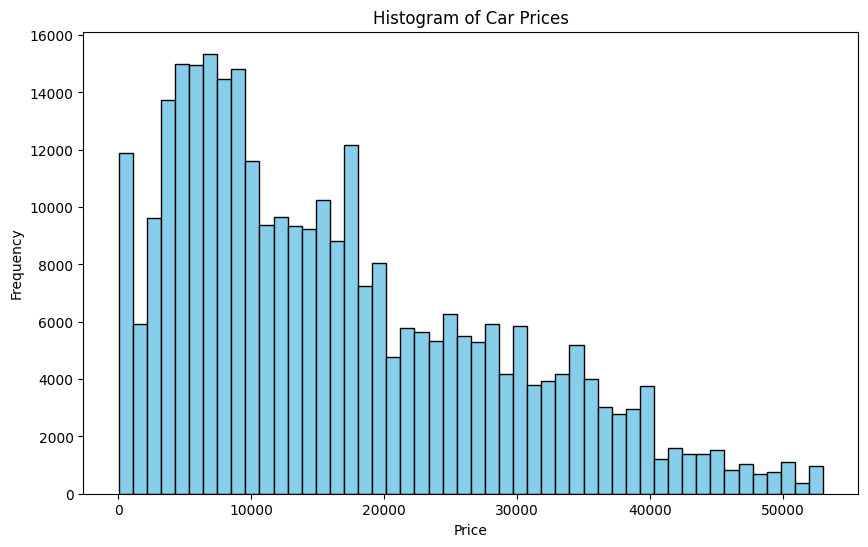

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df1['price'], bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

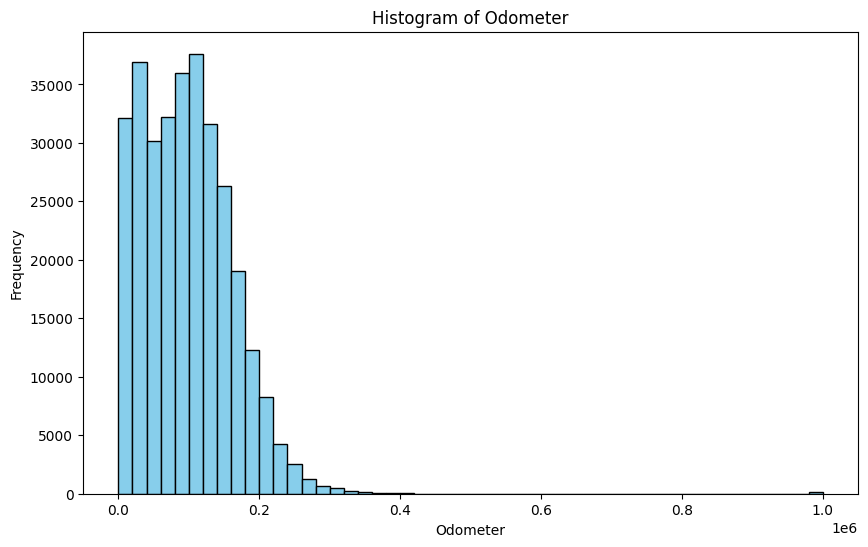

In [14]:
plt.figure(figsize=(10, 6))
plt.hist(df1['odometer'], bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Odometer')
plt.xlabel('Odometer')
plt.ylabel('Frequency')
plt.show()

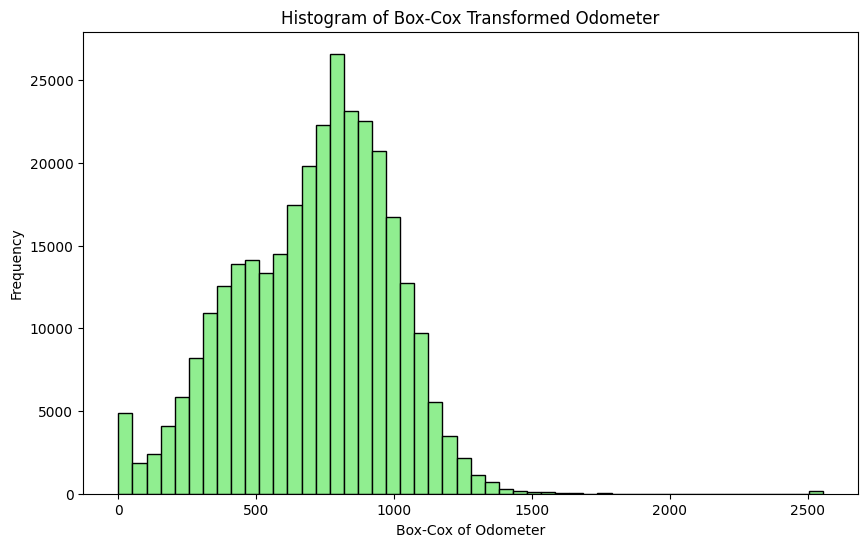

In [15]:
#ลองใช้ log กับ square root แล้วเบ้ทั้งคู่
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
df1['odometer'], _ = stats.boxcox(df1['odometer'] + 1)
plt.figure(figsize=(10, 6))
plt.hist(df1['odometer'], bins=50, color='lightgreen', edgecolor='black')
plt.title('Histogram of Box-Cox Transformed Odometer')
plt.xlabel('Box-Cox of Odometer')
plt.ylabel('Frequency')
plt.show()

In [16]:
df1

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,matched_make,matched_model
0,30990,2017.0,36,16545,2,12,8,483.469685,0,15,0,1,36,8,35,1606
1,15000,2013.0,12,7059,0,10,8,874.811383,0,32,2,1,38,0,12,732
2,27990,2012.0,13,14043,2,12,8,632.133441,0,24,0,1,36,0,13,1424
3,35000,2019.0,36,15330,0,10,8,494.876432,0,32,0,0,38,5,35,1519
4,29990,2016.0,7,4455,2,10,8,307.325883,0,24,0,2,36,8,7,473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346576,23590,2019.0,28,10674,2,10,8,425.596086,0,24,1,1,37,10,28,1063
346577,30590,2020.0,38,13449,2,6,8,253.999613,0,19,1,2,37,8,37,1357
346578,34990,2020.0,6,17595,2,6,6,145.572797,0,14,1,2,33,10,6,1728
346579,28990,2018.0,21,6261,2,10,8,410.755504,0,18,1,2,37,9,21,683


In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_standardized = scaler.fit_transform(df1)
df_standardized = pd.DataFrame(df_standardized, columns=df.columns, index=df.index)
df_standardized


,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,matched_make,matched_model
0,1.207050,0.729268,1.759381,1.474162,0.918221,1.226502,0.265272,-0.807022,-0.185047,-3.650878,-0.994565,-0.233622,0.614972,0.281075,1.735181,1.425717
1,-0.126952,0.209711,-0.496032,-0.418167,-0.915721,0.432118,0.265272,0.591639,-0.185047,0.283795,1.717315,-0.233622,0.768803,-1.724786,-0.491079,-0.355114
2,0.956769,0.079822,-0.402057,0.975047,0.918221,1.226502,0.265272,-0.275696,-0.185047,-1.567816,-0.994565,-0.233622,0.614972,-1.724786,-0.394285,1.054880
3,1.541594,0.989047,1.759381,1.231786,-0.915721,0.432118,0.265272,-0.766254,-0.185047,0.283795,-0.994565,-1.611395,0.768803,-0.471123,1.735181,1.248449
4,1.123623,0.599379,-0.965910,-0.937630,0.918221,0.432118,0.265272,-1.436562,-0.185047,-1.567816,-0.994565,1.144151,0.614972,0.281075,-0.975049,-0.882843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346576,0.589689,0.989047,1.007577,0.302977,0.918221,0.432118,0.265272,-1.013863,-0.185047,-1.567816,0.361375,-0.233622,0.691888,0.782541,1.057623,0.319320
346577,1.173680,1.118936,1.947332,0.856552,0.918221,-1.156649,0.265272,-1.627151,-0.185047,-2.725073,0.361375,1.144151,0.691888,0.281075,1.928769,0.918363
346578,1.540760,1.118936,-1.059885,1.683623,0.918221,-1.156649,-2.067874,-2.014670,-0.185047,-3.882330,0.361375,1.144151,0.384225,0.782541,-1.071843,1.674300
346579,1.040196,0.859158,0.349748,-0.577357,0.918221,0.432118,0.265272,-1.066903,-0.185047,-2.956524,0.361375,1.144151,0.691888,0.531808,0.380066,-0.454955


In [18]:
import pandas as pd
if df.index.equals(df_standardized.index):
    print("Index of both DataFrames are the same!")
else:
    print("Index of both DataFrames are different!")

Index of both DataFrames are the same!


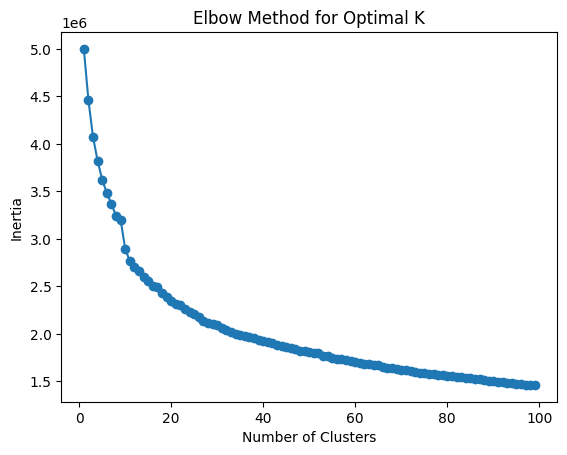

In [19]:
from sklearn.cluster import KMeans
#ดู Elbow Method
inertia = []
for k in range(1, 100):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_standardized)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 100), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

cluster
7     26096
3     24250
4     22527
12    22058
17    21762
10    19987
8     19530
6     18834
15    17906
2     16176
1     16093
11    15298
19    15272
14    11456
5     10940
13    10862
18     8604
9      6288
0      5126
16     3423
Name: count, dtype: int64


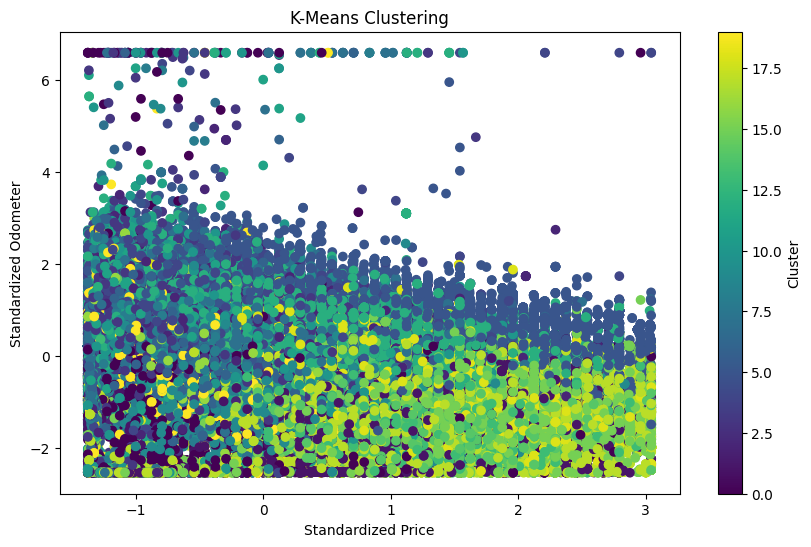

In [ ]:
from sklearn.cluster import KMeans

k = 20
kmeans = KMeans(n_clusters=k, random_state=42)
df_standardized['cluster'] = kmeans.fit_predict(df_standardized)
print(df_standardized['cluster'].value_counts())
plt.figure(figsize=(10, 6))
plt.scatter(df_standardized['price'], df_standardized['odometer'],
            c=df_standardized['cluster'], cmap='viridis')
plt.xlabel('Standardized Price')
plt.ylabel('Standardized Odometer')
plt.title('K-Means Clustering')
plt.colorbar(label='Cluster')
plt.show()

In [21]:
for k in [20]:
    for i in range(10,21):
        kmeans = KMeans(n_clusters=k, n_init=i).fit(df_standardized) 
        print(f'cluster {k} n_init {i}')
        labels = kmeans.labels_
        sse = kmeans.inertia_
        print(f"Sum of squared errors : {sse:.3f}")

cluster 20 n_init 10
Sum of squared errors : 2428396.968
cluster 20 n_init 11
Sum of squared errors : 2464132.633
cluster 20 n_init 12
Sum of squared errors : 2399738.517
cluster 20 n_init 13
Sum of squared errors : 2405034.512
cluster 20 n_init 14
Sum of squared errors : 2345929.416
cluster 20 n_init 15
Sum of squared errors : 2345929.416
cluster 20 n_init 16
Sum of squared errors : 2345929.416
cluster 20 n_init 17
Sum of squared errors : 2345929.416
cluster 20 n_init 18
Sum of squared errors : 2345929.416
cluster 20 n_init 19
Sum of squared errors : 2345929.416
cluster 20 n_init 20
Sum of squared errors : 2345929.416


In [22]:
df_standardized

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,matched_make,matched_model,cluster
0,1.207050,0.729268,1.759381,1.474162,0.918221,1.226502,0.265272,-0.807022,-0.185047,-3.650878,-0.994565,-0.233622,0.614972,0.281075,1.735181,1.425717,14
1,-0.126952,0.209711,-0.496032,-0.418167,-0.915721,0.432118,0.265272,0.591639,-0.185047,0.283795,1.717315,-0.233622,0.768803,-1.724786,-0.491079,-0.355114,10
2,0.956769,0.079822,-0.402057,0.975047,0.918221,1.226502,0.265272,-0.275696,-0.185047,-1.567816,-0.994565,-0.233622,0.614972,-1.724786,-0.394285,1.054880,15
3,1.541594,0.989047,1.759381,1.231786,-0.915721,0.432118,0.265272,-0.766254,-0.185047,0.283795,-0.994565,-1.611395,0.768803,-0.471123,1.735181,1.248449,1
4,1.123623,0.599379,-0.965910,-0.937630,0.918221,0.432118,0.265272,-1.436562,-0.185047,-1.567816,-0.994565,1.144151,0.614972,0.281075,-0.975049,-0.882843,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346576,0.589689,0.989047,1.007577,0.302977,0.918221,0.432118,0.265272,-1.013863,-0.185047,-1.567816,0.361375,-0.233622,0.691888,0.782541,1.057623,0.319320,1
346577,1.173680,1.118936,1.947332,0.856552,0.918221,-1.156649,0.265272,-1.627151,-0.185047,-2.725073,0.361375,1.144151,0.691888,0.281075,1.928769,0.918363,1
346578,1.540760,1.118936,-1.059885,1.683623,0.918221,-1.156649,-2.067874,-2.014670,-0.185047,-3.882330,0.361375,1.144151,0.384225,0.782541,-1.071843,1.674300,14
346579,1.040196,0.859158,0.349748,-0.577357,0.918221,0.432118,0.265272,-1.066903,-0.185047,-2.956524,0.361375,1.144151,0.691888,0.531808,0.380066,-0.454955,14


In [23]:
df['cluster'] = df_standardized['cluster']

In [24]:
df

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,matched_make,matched_model,cluster
0,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,Automatic (S6),4wd,full-size,pickup,red,toyota,tundra 4wd,14
1,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black,ford,f-150 lightning platinum 4wd,10
2,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,68696.0,clean,Automatic 6-spd,4wd,full-size,pickup,black,gmc,sierra k15 awd,15
3,35000,2019.0,toyota,tacoma,excellent,6 cylinders,gas,43000.0,clean,automatic,4wd,compact,truck,grey,toyota,tacoma 4wd,1
4,29990,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,clean,Automatic 6-spd,4wd,mid-size,pickup,red,chevrolet,colorado 4wd,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346576,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,Automatic 6-spd,fwd,full-size,sedan,white,nissan,maxima,1
346577,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,4 cylinders,gas,12029.0,clean,Automatic (variable gear ratios),fwd,mid-size,sedan,red,volvo,s60,1
346578,34990,2020.0,cadillac,xt4 sport suv 4d,good,4 cylinders,diesel,4174.0,clean,Automatic (S5),fwd,mid-size,hatchback,white,cadillac,xt4 fwd,14
346579,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,Automatic (S9),fwd,mid-size,sedan,silver,lexus,es 350,14


In [ ]:
df.to_csv('output_cluster2.csv', index=False)